In [5]:
"""
Created on 03/01/2023
Group 2
Authors: S.V.
License: this code is released under the CeCILL 2.1 license. See
https://www.cecill.info/licenses/Licence_CeCILL_V2.1-en.txt
"""

'\nCreated on 03/01/2023\nGroup 2\nAuthors: S.V.\nLicense: this code is released under the CeCILL 2.1 license. See\nhttps://www.cecill.info/licenses/Licence_CeCILL_V2.1-en.txt\n'

In [86]:
import os
import sys
import math
from sklearn.model_selection import train_test_split, cross_val_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from scipy.stats import pearsonr

In [63]:
data = pd.read_csv("Dataset_complete.csv")
data

,initiator,target,protocol,nlos_indicator,t1,t2,t3,t4,skew,tof,...,course_dist,temperature_initiator,temperature_target,timestamp,seqnum,rssi_request,rssi_ack,rssi_data,rssi_mean,register_dump_CIR
0,183,100,TWR,2.783982,946218857614,946490292658,946594234510,946322802711,-2.368804,1622,...,0.000000,30.980000,30.220001,1654929794228,4,-80.136574,-80.077130,-79.836296,-80.016667,"{""ACC_MEM"": ""AAT/9gACAAr/+wABAAL/8wAS//AACgAGA..."
1,183,100,TWR,2.920485,1009474709646,1009746235572,1009850439822,1009578917162,-1.045965,1633,...,0.000000,30.980000,29.840002,1654929795219,10,-80.267769,-79.988684,-79.835720,-80.030724,"{""ACC_MEM"": ""//gAEwAC//X/9gAXABEACwASABQAFgAG/..."
2,183,100,TWR,2.536090,1072923068046,1073194681670,1073299179662,1073027569304,-0.799856,1633,...,0.000000,30.980000,29.840002,1654929796210,16,-79.964310,-79.850138,-79.693502,-79.835983,"{""ACC_MEM"": ""//QABQAJ//X/9gAUABMADv/3//r//gAK/..."
3,183,100,TWR,2.857669,36731534990,37003232943,37107270798,36835576116,-0.984438,1635,...,0.000000,30.980000,29.840002,1654929797201,22,-80.040833,-79.818313,-79.849525,-79.902890,"{""ACC_MEM"": ""ACb//AAa//4ADQAJAAYALf/+ABQAEgAOA..."
4,183,100,TWR,2.263103,99923195534,100194974620,100298828942,100027053147,-0.769092,1645,...,0.000000,30.980000,29.840002,1654929798190,28,-79.999908,-80.102552,-80.022316,-80.041592,"{""ACC_MEM"": ""//b/+P/6//3/8QAI//H//P/1AAkAAv/3A..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3941,183,184,TWR,3.075243,301428484750,302000434919,302102988430,301531040251,-9.382925,995,...,6.999961,41.810001,46.939999,1654930833773,4231,-80.229179,-79.428015,-79.342829,-79.666674,"{""ACC_MEM"": ""ABH//QAT//YABQASAAIAFwAUAAsAAv/3A..."
3942,183,184,TWR,3.085177,375355600014,375928251294,376031194254,375458544956,-8.306196,991,...,6.999961,41.525002,47.319996,1654930834930,4237,-80.196487,-79.576395,-79.985511,-79.919464,"{""ACC_MEM"": ""ABkADQAOAAgABv/7ABgABAAG//n////w/..."
3943,183,184,TWR,2.674524,449294310542,449867663034,449970544782,449397194279,-8.952233,994,...,6.999961,41.810001,46.939999,1654930836088,4243,-80.158638,-79.435472,-79.234453,-79.609521,"{""ACC_MEM"": ""AA8AAQAE/////P/zABz/+P////8AAwAAA..."
3944,183,184,TWR,2.727551,523279420046,523853474064,523955982478,523381930458,-8.490778,999,...,6.999961,41.240002,46.559998,1654930837246,4249,-80.229492,-79.554364,-79.599858,-79.794571,"{""ACC_MEM"": ""ABoACwAEABEACQADAAL//wAPAAYAFP/4A..."


In [22]:
# check for missing values
data.isna()

,target,nlos_indicator,t1,t2,t3,t4,skew,tof,tof_skew,range,...,distance,course_dist,temperature_initiator,temperature_target,timestamp,seqnum,rssi_request,rssi_ack,rssi_data,rssi_mean
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3941,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3942,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3943,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3944,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Il n'y a pas de valeurs manquantes dans le jeu de données.

{'whiskers': [<matplotlib.lines.Line2D at 0x7fd20bdf4340>,
 'caps': [<matplotlib.lines.Line2D at 0x7fd20bdf4a00>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fd20bde6fa0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fd20bdff100>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fd20bdff400>],
 'means': []}

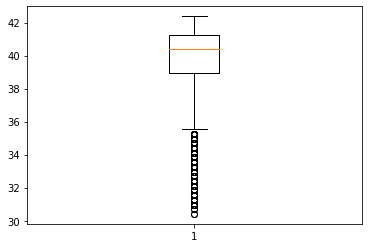

In [46]:
# temperature intiator's distribution 
plt.boxplot(data.temperature_initiator)

{'whiskers': [<matplotlib.lines.Line2D at 0x7fd20af906a0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fd20b8e87f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fd20af70760>],
 'medians': [<matplotlib.lines.Line2D at 0x7fd20b9b41f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fd20b9af8b0>],
 'means': []}

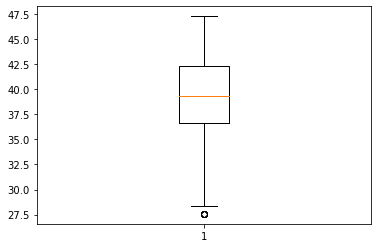

In [43]:
# temperature target's distribution 
plt.boxplot(data.temperature_target)

Il n'y a pas une flagrante différence entre la répartition de la température côté client (temperature_initiator) et la température côté serveur (temperature_target). On remarque que l'écart entre le 1er et le 3ème quartile pour temperature_target est plus grand que celui pour temperature_initiator. De plus, on voit qu'il a y a beaucoup de valeurs aberrantes chez temperature_target.

(array([130., 436., 658., 971., 792., 442.,  40.,   0.,  87., 390.]),
 array([ 0.    ,  1.2722,  2.5444,  3.8166,  5.0888,  6.361 ,  7.6332,
         8.9054, 10.1776, 11.4498, 12.722 ]),
 <a list of 10 Patch objects>)

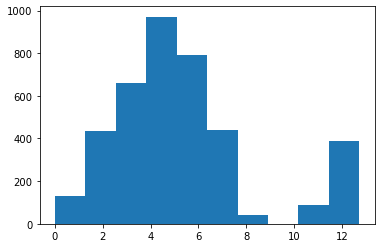

In [60]:
plt.hist(data.distance)

In [65]:
# checking existence of variables with unique values
print('loc_initiator_z : ', data.loc_initiator_z.unique())
print('loc_target_z : ', data.loc_target_z.unique())
print('protocol : ', data.protocol.unique())
print('ranging_unit : ', data.ranging_unit.unique())
print('initiator : ', data.initiator.unique())
data.register_dump_CIR

loc_initiator_z :  [2.65]
loc_target_z :  [2.65  2.658]
protocol :  ['TWR']
ranging_unit :  ['m']
initiator :  [183]


0       {"ACC_MEM": "AAT/9gACAAr/+wABAAL/8wAS//AACgAGA...
1       {"ACC_MEM": "//gAEwAC//X/9gAXABEACwASABQAFgAG/...
2       {"ACC_MEM": "//QABQAJ//X/9gAUABMADv/3//r//gAK/...
3       {"ACC_MEM": "ACb//AAa//4ADQAJAAYALf/+ABQAEgAOA...
4       {"ACC_MEM": "//b/+P/6//3/8QAI//H//P/1AAkAAv/3A...
                              ...                        
3941    {"ACC_MEM": "ABH//QAT//YABQASAAIAFwAUAAsAAv/3A...
3942    {"ACC_MEM": "ABkADQAOAAgABv/7ABgABAAG//n////w/...
3943    {"ACC_MEM": "AA8AAQAE/////P/zABz/+P////8AAwAAA...
3944    {"ACC_MEM": "ABoACwAEABEACQADAAL//wAPAAYAFP/4A...
3945    {"ACC_MEM": "AAf/8QACAAYAA///AAn/8f/y//z/5P/+/...
Name: register_dump_CIR, Length: 3946, dtype: object

loc_initiator_z, protocol, ranging_unit et initiator ont des valeurs uniques, elles n'apportent donc rien dans la base de données pour étudier le lien entre les variables, on peut les supprimer. On enlève aussi register_dump_CIR car elle va nous servir à rien là pour voir le lien entre les variables.

In [66]:
# deleting variables
data = data.drop(['loc_initiator_z', 'protocol', 'ranging_unit', 'initiator', 'register_dump_CIR'], axis=1)
data

,target,nlos_indicator,t1,t2,t3,t4,skew,tof,tof_skew,range,...,distance,course_dist,temperature_initiator,temperature_target,timestamp,seqnum,rssi_request,rssi_ack,rssi_data,rssi_mean
0,100,2.783982,946218857614,946490292658,946594234510,946322802711,-2.368804,1622,1745.608935,7.607739,...,7.962,0.000000,30.980000,30.220001,1654929794228,4,-80.136574,-80.077130,-79.836296,-80.016667
1,100,2.920485,1009474709646,1009746235572,1009850439822,1009578917162,-1.045965,1633,1687.497019,7.659333,...,7.962,0.000000,30.980000,29.840002,1654929795219,10,-80.267769,-79.988684,-79.835720,-80.030724
2,100,2.536090,1072923068046,1073194681670,1073299179662,1073027569304,-0.799856,1633,1674.791667,7.659333,...,7.962,0.000000,30.980000,29.840002,1654929796210,16,-79.964310,-79.850138,-79.693502,-79.835983
3,100,2.857669,36731534990,37003232943,37107270798,36835576116,-0.984438,1635,1686.709409,7.668714,...,7.962,0.000000,30.980000,29.840002,1654929797201,22,-80.040833,-79.818313,-79.849525,-79.902890
4,100,2.263103,99923195534,100194974620,100298828942,100027053147,-0.769092,1645,1685.436774,7.715617,...,7.962,0.000000,30.980000,29.840002,1654929798190,28,-79.999908,-80.102552,-80.022316,-80.041592
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3941,184,3.075243,301428484750,302000434919,302102988430,301531040251,-9.382925,995,1476.125937,4.666893,...,7.000,6.999961,41.810001,46.939999,1654930833773,4231,-80.229179,-79.428015,-79.342829,-79.666674
3942,184,3.085177,375355600014,375928251294,376031194254,375458544956,-8.306196,991,1418.532184,4.648132,...,7.000,6.999961,41.525002,47.319996,1654930834930,4237,-80.196487,-79.576395,-79.985511,-79.919464
3943,184,2.674524,449294310542,449867663034,449970544782,449397194279,-8.952233,994,1455.010695,4.662203,...,7.000,6.999961,41.810001,46.939999,1654930836088,4243,-80.158638,-79.435472,-79.234453,-79.609521
3944,184,2.727551,523279420046,523853474064,523955982478,523381930458,-8.490778,999,1434.188082,4.685655,...,7.000,6.999961,41.240002,46.559998,1654930837246,4249,-80.229492,-79.554364,-79.599858,-79.794571


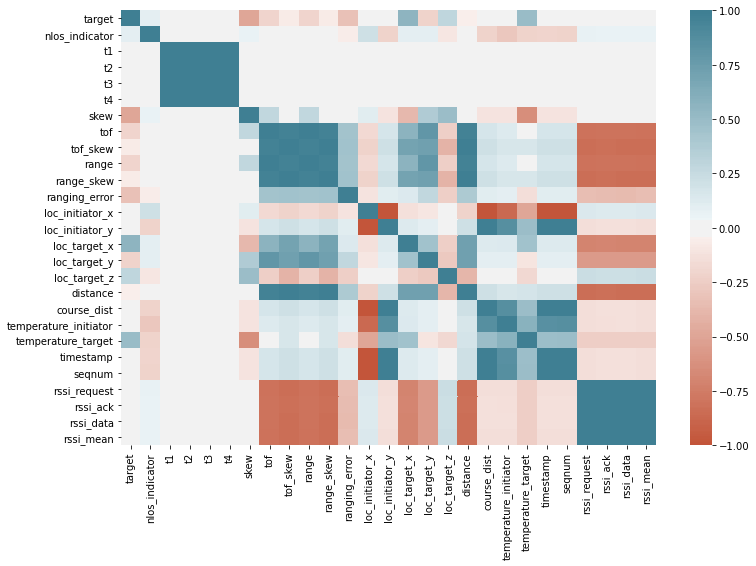

In [81]:
# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200))
plt.show()

On peut voir que les variables tof, tof_skew, range, range_skew sont très corrélées négativement avec rssi_request, rssi_ack, rssi_data et rssi_data. Ces dernières sont très corrélées négativement avec distance ceci paraît logique car plus la distance va augmenter, moins les messages vont être reçus rapidement. 

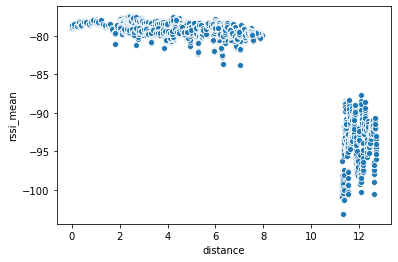

In [76]:
sns.scatterplot(data=data, x="distance", y="rssi_mean")
plt.show()

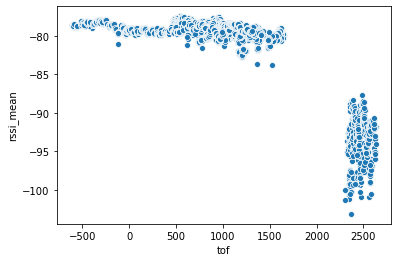

In [77]:
sns.scatterplot(data=data, x="tof", y="rssi_mean")
plt.show()

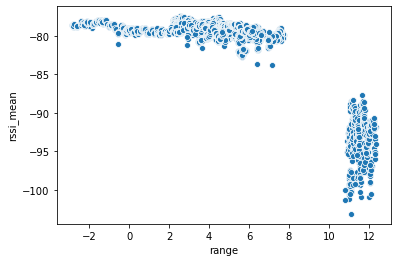

In [79]:
sns.scatterplot(data=data, x="range", y="rssi_mean")
plt.show()